In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection
import matplotlib.patches as patches


In [9]:
def loadInitialData(fname):
    with open(fname, "r") as fd:
        N = int(float(fd.readline()))
        pos = []
        sizes = []
        labels = []
        n = 0
        for line in fd.readlines():
            toks = line.replace(",", ".").split(" ")
            pos.append([float(toks[0]), float(toks[1])])
            sizes.append([float(toks[2]), float(toks[2])])
            labels.append(float(toks[4]))
            n += 1
    return np.array(pos), np.array(sizes), np.array(labels).astype(int)

In [10]:
def loadOverlapFreeData(fname):
    pos = []
    sizes = []
    with open(fname, "r") as f:
        firstline_toks = f.readline().split(" ")
        time = float(firstline_toks[0].replace(",", "."))
        n = 0
        for line in f.readlines():
            toks = line.replace(",", ".").split(" ")
            pos.append([float(toks[0]), float(toks[1])])
            sizes.append([float(toks[2]), float(toks[3])])               
            n+=1
        f.close()
    return np.array(pos), np.array(sizes), time

In [11]:
def getBoundingBox(pos, radiuses):
    pos_min = pos - np.expand_dims(radiuses, -1)
    pos_max = pos + np.expand_dims(radiuses, -1)
        
    xmin = np.min(pos_min[:,0])
    ymin = np.min(pos_min[:,1])

    xmax = np.max(pos_max[:,0])
    ymax = np.max(pos_max[:,1])

    bb_w = xmax - xmin
    bb_h = ymax - ymin
    bb_cx = xmin + bb_w / 2
    bb_cy = ymin + bb_h / 2
    return (bb_cx, bb_cy, bb_w, bb_h)

def draw_points(pos, radiuses, colors, ax=None, figsize=(7,5), off_axis=False, nodes_alpha=0.5):
    assert pos.shape[0] == radiuses.shape[0], f"pos: {pos.shape}, radiuses: {radiuses.shape}" 

    N = pos.shape[0]
    ax_was_None = ax == None
    if(ax is None):
        ax = plt.gca()
    if(figsize is not None and ax_was_None):
        plt.gcf().set_size_inches(figsize)

    col = EllipseCollection(widths=radiuses*2, heights=radiuses*2, angles=np.zeros(N), offsets=pos,transOffset=ax.transData, units="x",facecolors=colors, alpha=nodes_alpha, antialiased=False, linewidth=0)
    ax.add_collection(col)
    
    BB = getBoundingBox(pos, radiuses)
    ax.set_xlim(BB[0] - BB[2]/2,BB[0] + BB[2]/2)
    ax.set_ylim(BB[1] - BB[3]/2,BB[1] + BB[3]/2)

    if(off_axis):
        ax.axis("off")
    if(ax_was_None):
        plt.tight_layout()
        # plt.show()
    return ax

<Axes: >

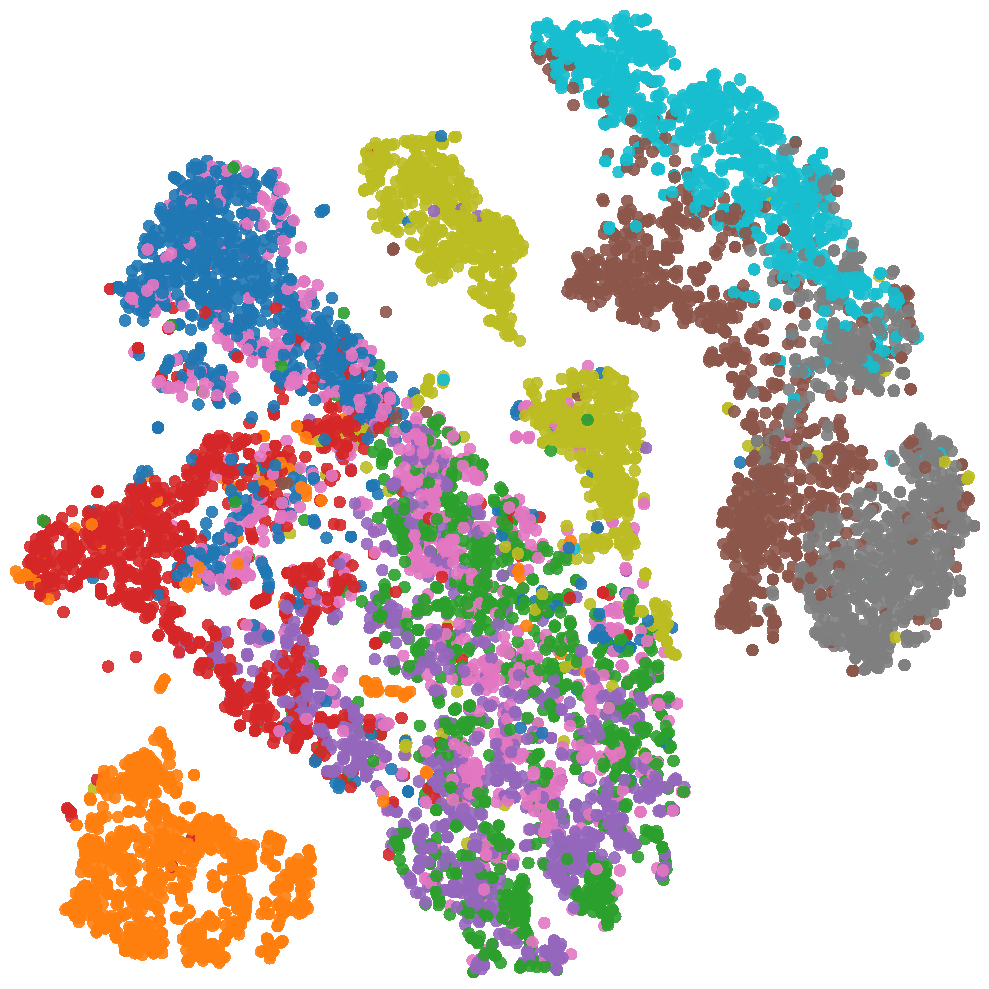

In [12]:
init_pos, init_diameters_2d, labels = loadInitialData("./tsne-fashion.txt")
init_radiuses = init_diameters_2d[:,0] / 2
colors = [f"C{int(l)}" for l in labels]
draw_points(init_pos, init_radiuses, colors, figsize=(10,10), off_axis=True, nodes_alpha=0.9)

In [13]:
def gist_call(data_path):
    alpha = 1
    k = -2
    minmove = 0.0001
    maxiter = 200
    maxpass = 1000
    scalestep = 0.5
    tolerance = 1.
    R=2000

    prime = 0 #legacy, can be ignored
    maxScale = -1 #legacy, can be ignored

    args = [alpha, k, minmove, maxiter, maxpass, scalestep, prime, tolerance, maxScale, R]

    exec_path = "./gist"
    cmd = f"{exec_path} {data_path} "
    for arg in args:
        cmd += str(arg) + " "
    print(cmd)
    os.system(cmd)

    return loadOverlapFreeData(data_path+".gist")

./gist ./tsne-fashion.txt 1 -2 0.0001 200 1000 0.5 0 1.0 -1 2000 
tolerance : 1
==== pass 0 ; diam : 12.7616 ====
KO
==== pass 1 ; diam : 6.88079 ====
OK
==== pass 2 ; diam : 9.82119 ====
OK
==== pass 3 ; diam : 11.2914 ====
OK
==== pass 4 ; diam : 12.0265 ====
OK
==== pass 5 ; diam : 12.394 ====
OK
save : ./tsne-fashion.txt.gist
DONE in 1389.87 ms; saved to ./tsne-fashion.txt.gist


<Axes: >

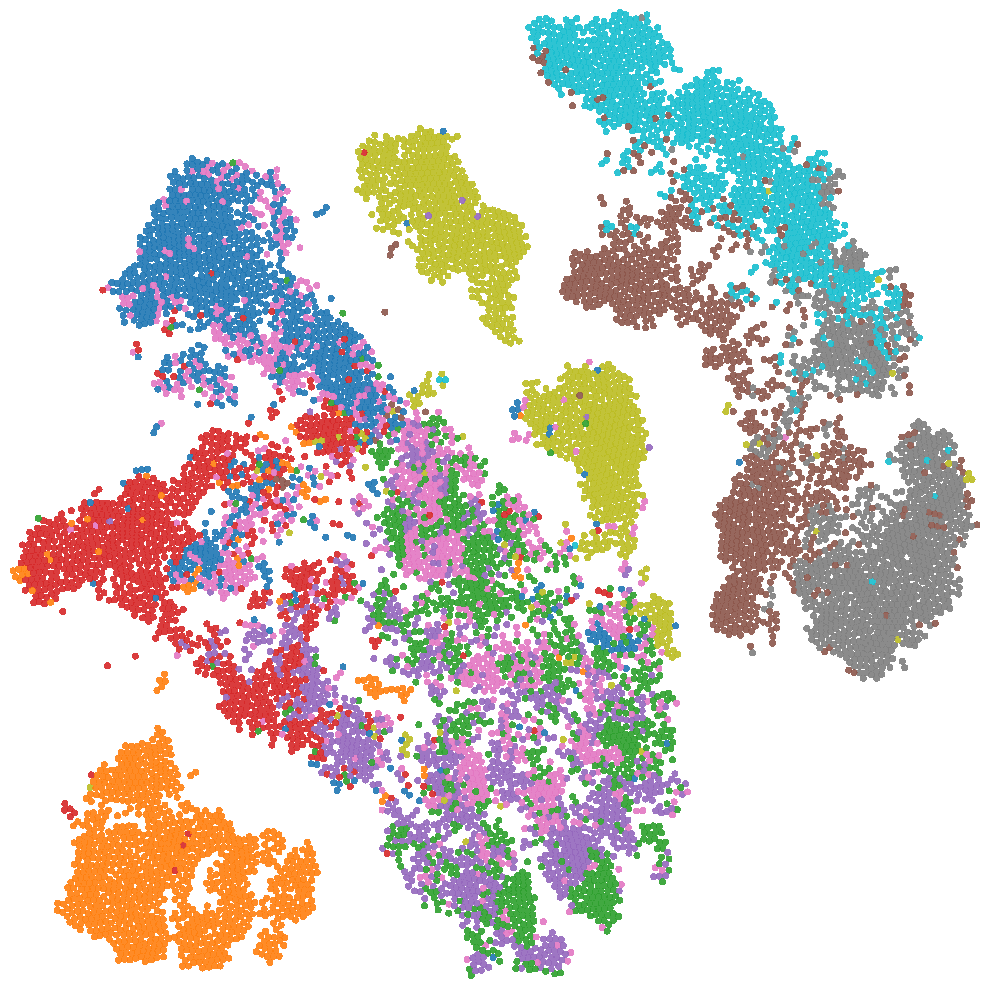

In [14]:
of_pos, of_diameters_2d, exec_time = gist_call("./tsne-fashion.txt")
of_radiuses = of_diameters_2d[:,0] / 2
draw_points(of_pos, of_radiuses, colors, figsize=(10,10), off_axis=True, nodes_alpha=0.9)